## Setup

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data_frame.csv")
df = df.rename(columns={
    "Unnamed: 0": "County",
    "Confirmed": "Confirmed Cases",
    "Active": "Active Cases",
    "Population Density (/mi^2)": "Population Density (persons/mi^2)",
    "Males per 100 Females": "Sex Ratio (males/100 females)"
})
df = df.drop(columns="County")
columns = list(df.columns)

## Correlation Matrix

We plot the correlation matrix to test for independence. Note some variables are not independent with each other.

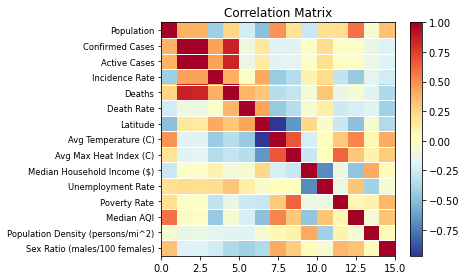

In [4]:
smg.plot_corr(np.corrcoef(df.T), ynames=columns)
plt.show()

## Q-Q Plots

We then examine the Q-Q plots. Note most variables are in some need of regularization.

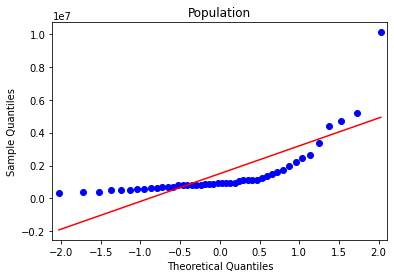

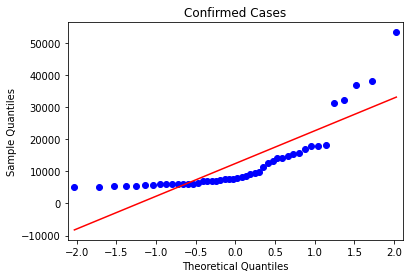

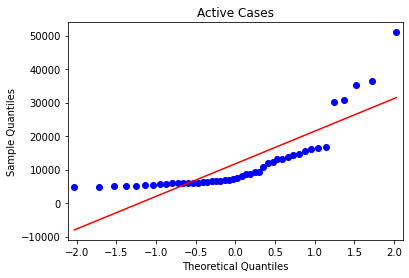

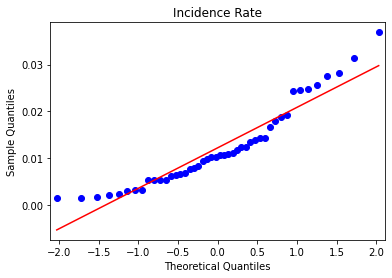

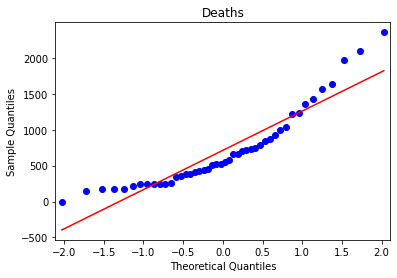

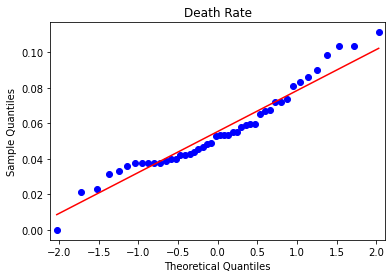

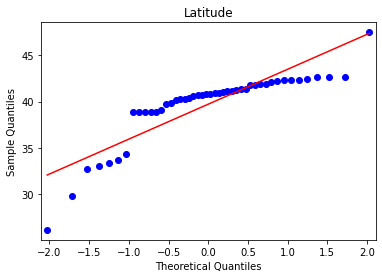

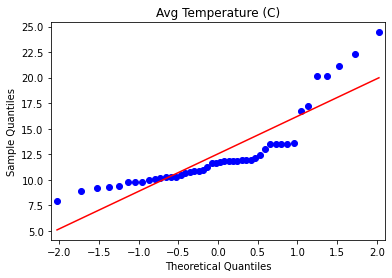

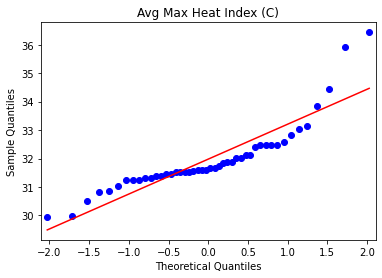

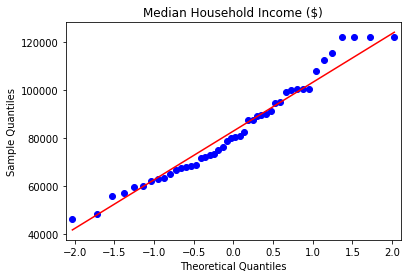

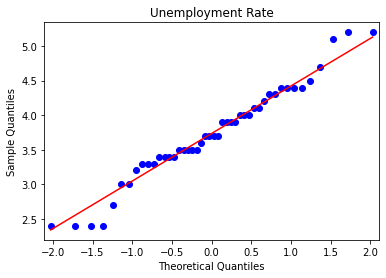

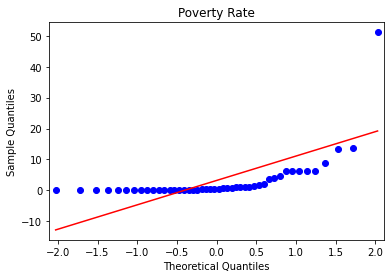

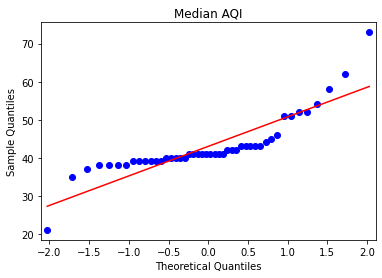

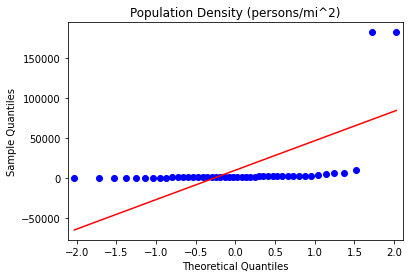

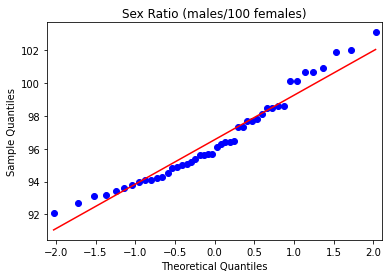

In [5]:
for column in df.columns:
    sm.qqplot(df[column], line='s')
    plt.title(column)
    plt.show()


## Multiple Linear Regressions (Unregularized and Regularized)

In [66]:
X = df.drop(columns=["Death Rate", "Incidence Rate", "Confirmed Cases", "Active Cases", "Latitude", "Median Household Income ($)"])
X = sm.add_constant(X)
Y1 = df["Death Rate"]
Y2 = df["Incidence Rate"]
model1 = sm.OLS(Y1, X)
model2 = sm.OLS(Y2, X)

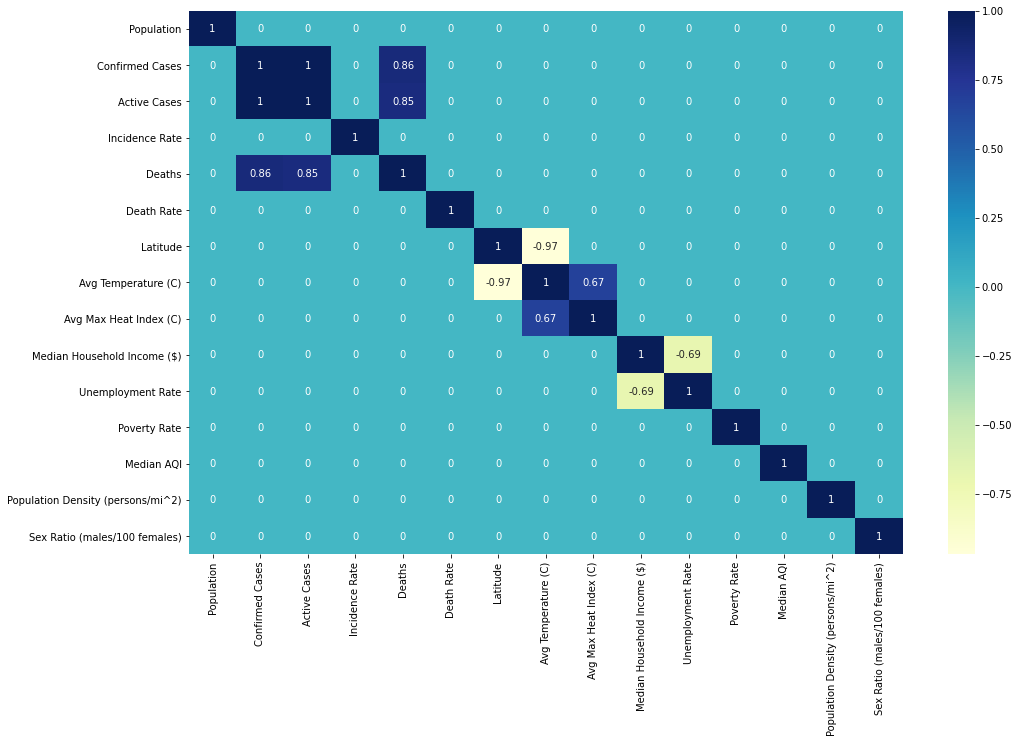

In [67]:
corr = df.corr()
corr
corr[np.abs(corr) < 0.65] = 0
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

### Death Rate (Unregularized)

In [68]:
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death Rate   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     1.862
Date:                Tue, 12 May 2020   Prob (F-statistic):             0.0903
Time:                        14:12:05   Log-Likelihood:                 116.90
No. Observations:                  46   AIC:                            -213.8
Df Residuals:                      36   BIC:                            -195.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.2473      0.217      1.140      0.262      -0.193       0.687
Population                        -2.503e-09   3.12e-09     -0.801      0.428   -8.84e-09    3.83e-09
Deaths                             1.091e-05   8.17e-06      1.336      0.190   -5.65e-06    2.75e-05
Avg Temperature (C)                  -0.0011      0.002     -0.679      0.502      -0.004       0.002
Avg Max Heat Index (C)               -0.0012      0.005     -0.241      0.811      -0.011       0.009
Unemployment Rate                    -0.0002      0.006     -0.027      0.979      -0.012       0.011
Poverty Rate                      -4.236e-05      0.001     -0.069      0.946      -0.001       0.001
Median AQI                            0.0002      0.001      0.396      0.695      -0.001       0.001
Population Density (persons/mi^2) -6.439e-08   9.55e-08     -0.674      0.505   -2.58e-07    1.29e-07
Sex Ratio (males/100 females)        -0.0016      0.002     -1.048      0.301      -0.005       0.001
==============================================================================
Omnibus:                        2.882   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.220
Skew:                           0.049   Prob(JB):                        0.330
Kurtosis:                       4.072   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Incidence Rate (Unregularized)

In [69]:
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Incidence Rate   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     5.623
Date:                Tue, 12 May 2020   Prob (F-statistic):           7.66e-05
Time:                        14:13:03   Log-Likelihood:                 173.32
No. Observations:                  46   AIC:                            -326.6
Df Residuals:                      36   BIC:                            -308.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0546      0.064     -0.858      0.397      -0.184       0.074
Population                        -2.844e-09   9.16e-10     -3.104      0.004    -4.7e-09   -9.86e-10
Deaths                             8.735e-06    2.4e-06      3.647      0.001    3.88e-06    1.36e-05
Avg Temperature (C)                   0.0005      0.000      0.939      0.354      -0.001       0.001
Avg Max Heat Index (C)               -0.0008      0.001     -0.545      0.589      -0.004       0.002
Unemployment Rate                     0.0033      0.002      1.965      0.057      -0.000       0.007
Poverty Rate                         -0.0002      0.000     -0.929      0.359      -0.001       0.000
Median AQI                           -0.0004      0.000     -2.082      0.045      -0.001   -9.34e-06
Population Density (persons/mi^2)  1.799e-09    2.8e-08      0.064      0.949    -5.5e-08    5.86e-08
Sex Ratio (males/100 females)         0.0009      0.000      2.066      0.046    1.66e-05       0.002
==============================================================================
Omnibus:                       11.697   Durbin-Watson:                   2.534
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.794
Skew:                           0.930   Prob(JB):                      0.00167
Kurtosis:                       4.792   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Death Rate (Regularized)

In [64]:
#model1.fit_regularized(alpha=0.1, refit=True).summary()

/Users/annakrutsinger/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/annakrutsinger/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/annakrutsinger/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/annakrutsinger/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Death Rate   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     33.22
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.66e-12
Time:                        14:10:56   Log-Likelihood:                 140.92
No. Observations:                  46   AIC:                            -271.8
Df Residuals:                      42   BIC:                            -262.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                      0          0        nan        nan           0           0
Population                                 0          0        nan        nan           0           0
Confirmed Cases                    2.236e-05   1.88e-06     11.887      0.000    1.86e-05    2.62e-05
Active Cases                      -2.595e-05   2.17e-06    -11.969      0.000   -3.03e-05   -2.16e-05
Deaths                             4.831e-05   4.05e-06     11.942      0.000    4.01e-05    5.65e-05
Avg Temperature (C)                        0          0        nan        nan           0           0
Avg Max Heat Index (C)                     0          0        nan        nan           0           0
Unemployment Rate                          0          0        nan        nan           0           0
Poverty Rate                               0          0        nan        nan           0           0
Median AQI                                 0          0        nan        nan           0           0
Population Density (persons/mi^2)          0          0        nan        nan           0           0
Sex Ratio (males/100 females)         0.0005   2.95e-05     16.486      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.883   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                0.995
Skew:                           0.171   Prob(JB):                        0.608
Kurtosis:                       3.634   Cond. No.                     3.34e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Incidence Rate (Regularized)

In [65]:
#model2.fit_regularized(alpha=0.1, refit=True).summary()

Addressing Homeoscedasticity